### Imports 

In [66]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

## Sample Data

This sample data is from ISLR. It displays sales (in thousands of units) for a particular product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper media.

In [3]:
df = pd.read_csv("Advertising.csv")

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Is there any relationship between total_spend and sales ? 

<AxesSubplot:xlabel='None', ylabel='sales'>

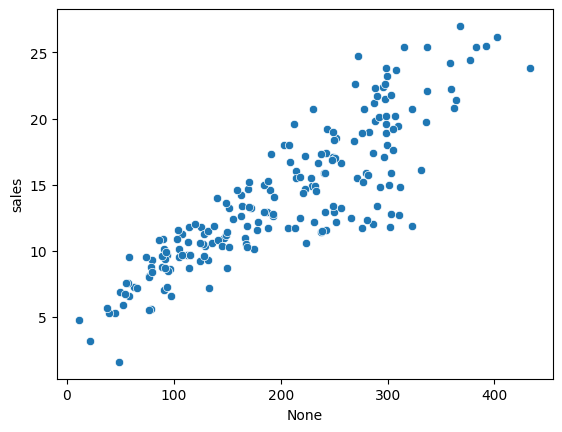

In [6]:
sns.scatterplot( x = df["TV"] + df["radio"] + df["newspaper"] , y = df["sales"])

Is there a relationship between money spend on each advertising channel and sales ? 

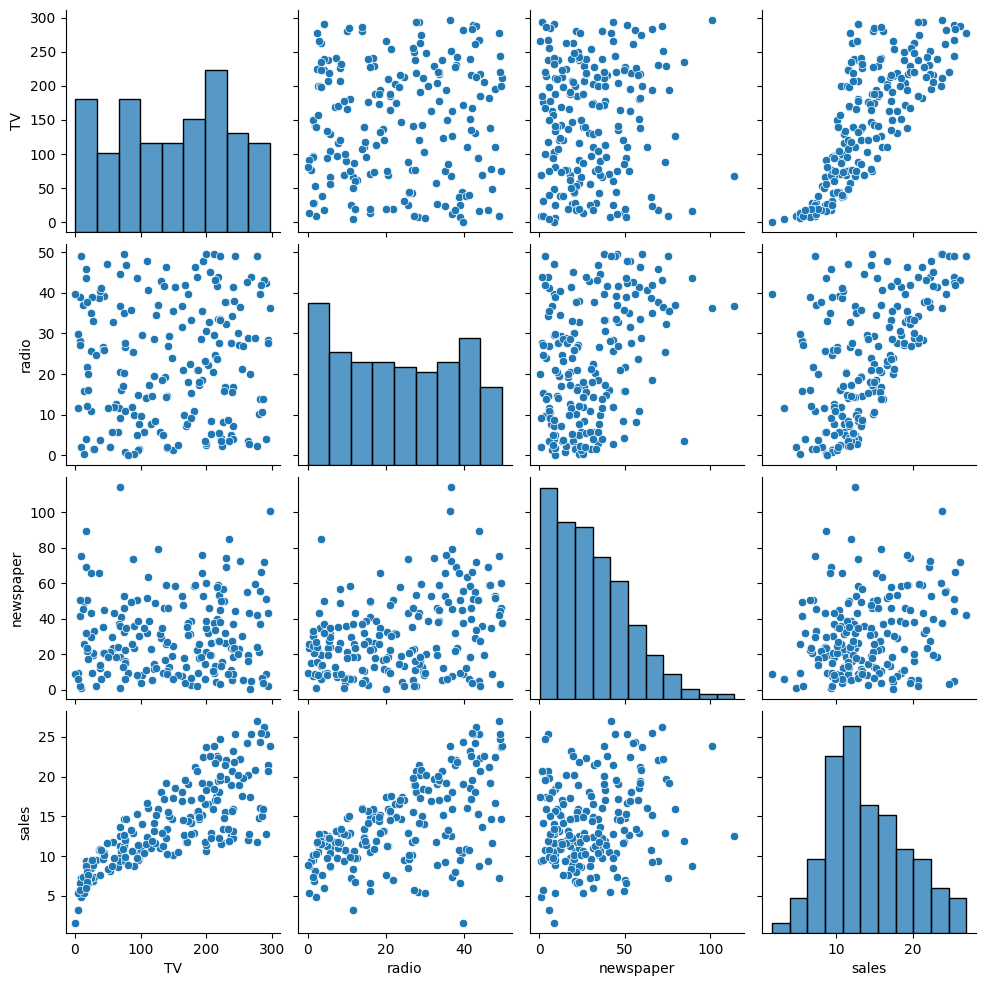

In [98]:
sns.pairplot(data = df)

In [14]:
# Grabbing the Features column "X" 
X = df.drop("sales" , axis = 1)

In [16]:
# Grabbing the Label column "y"
y = df["sales"]

## Applying Linear Regression Model 

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
from sklearn.model_selection import train_test_split 

In [22]:
from sklearn.metrics import mean_absolute_error , mean_squared_error 

splitting the training and test data 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
model = LinearRegression()

Fit / Training the model on the training data 

In [19]:
model.fit(X_train , y_train)

LinearRegression()

In [21]:
train_predictions = model.predict(X_train)

In [27]:
MAE = mean_absolute_error(y_train , train_predictions)
MSE = mean_squared_error(y_train , train_predictions)
RMSE = np.sqrt(mean_squared_error(y_train, train_predictions))

In [38]:
df["sales"].mean()

14.0225

### Evaluating Model's Performance

In [28]:
MAE

1.1308878428716258

In [29]:
MSE

2.410858654557854

In [30]:
RMSE

1.5526939990087725

In [32]:
test_predictions = model.predict(X_test)

In [34]:
MAE = mean_absolute_error(y_test , test_predictions)
MSE = mean_squared_error(y_test , test_predictions)
RMSE = np.sqrt(mean_squared_error(y_test , test_predictions))

In [35]:
MAE

1.4937750024728964

In [36]:
MSE

3.7279283306815088

In [37]:
RMSE

1.93078438223472

### Plotting Residuals For Advertising Data

It's also important to plot out residuals and check for normal distribution, this helps us understand if Linear Regression was a valid model choice.

In [39]:
# Predictions on training and testing sets 
# Plotting residuals seperately will alert us to any issue with the split call 
train_residuals = y_train - train_predictions
test_residuals = y_test - test_predictions

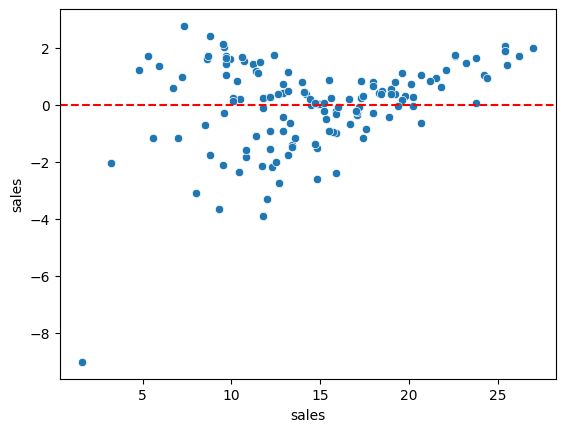

In [50]:
sns.scatterplot(x = y_train , y = train_residuals)
plt.axhline(y = 0 , color = "red" , linestyle = "--")

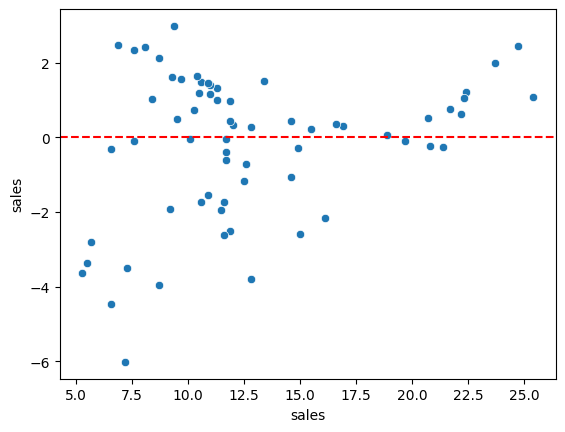

In [51]:
sns.scatterplot(x= y_test , y = test_residuals)
plt.axhline(y = 0 , color = "red" , linestyle = "--")

In [52]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [54]:
model.coef_
#TV has a coefficient of 0.044 , radio has 0.196 , newspaper has 0.006

array([0.04466512, 0.19663006, 0.00607439])

## Applying Polynomial Regression Model 

In [55]:
from sklearn.preprocessing import PolynomialFeatures 

In [59]:
# Training errors per degree 
train_MAE_errors = []
train_MSE_errors = [] 
train_RMSE_errors = [] 

# Testing errors per degree 
test_MAE_errors = [] 
test_MSE_errors = [] 
test_RMSE_errors = [] 

for d in range (1,7) :
    
    # Create polynomial data set for degree "d" : 
    polynomial_converter = PolynomialFeatures(degree = d , include_bias= False)
    polynomial_features = polynomial_converter.fit_transform(X)
    
    # Splitting this polynomial data set into testing and training data 
    X_train, X_test, y_train, y_test = train_test_split(polynomial_features, y, test_size=0.33, random_state=42)
    
    # Training on this new polynomial data set 
    model = LinearRegression() 
    model.fit(X_train , y_train)
    
    # Predicting on both training and testing set 
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    # Calculating errors in training set 
    MAE_train = mean_absolute_error(y_train , train_predictions)
    MSE_train = mean_squared_error(y_train , train_predictions)
    RMSE_train = np.sqrt(mean_squared_error(y_train , train_predictions))
    
    # Calculating errors in testing set 
    MAE_test = mean_absolute_error(y_test , test_predictions)
    MSE_test = mean_squared_error(y_test , test_predictions)
    RMSE_test = np.sqrt(mean_squared_error(y_test , test_predictions))
    
    # Appending training errors to the list 
    train_MAE_errors.append(MAE_train) 
    train_MSE_errors.append(MSE_train) 
    train_RMSE_errors.append(RMSE_train) 
    
    # Appending testing errors to the list 
    test_MAE_errors.append(MAE_test)
    test_MSE_errors.append(MSE_test) 
    test_RMSE_errors.append(RMSE_test) 
    

### Plotting graph between error and degree of polynomial 

MAE error 

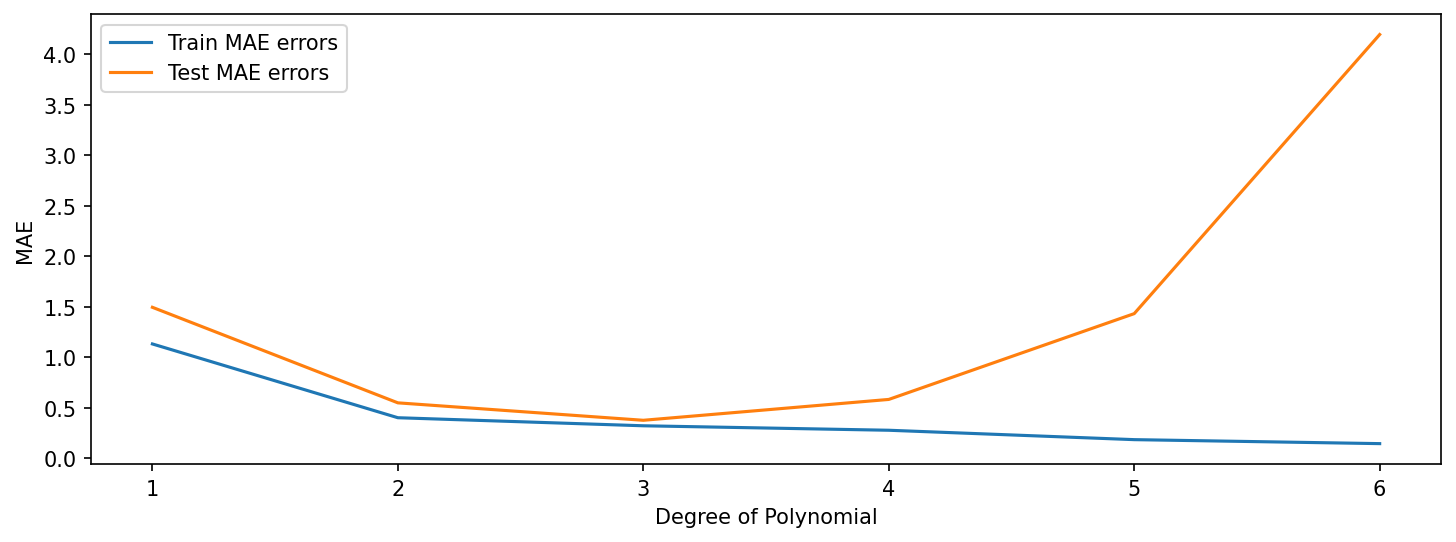

In [82]:
# Creating empty canvas 
figure = plt.figure(figsize=(9,3) , dpi = 150) 
# Adding axes to the figure 
axes = figure.add_axes([0,0,1,1])
# Plotting on the axes 
axes.plot(range(1,7) , train_MAE_errors , label = "Train MAE errors")
axes.plot(range(1,7) , test_MAE_errors , label = "Test MAE errors") 
# Adding axes labels 
axes.set_xlabel("Degree of Polynomial")
axes.set_ylabel("MAE")
plt.legend()


MSE error

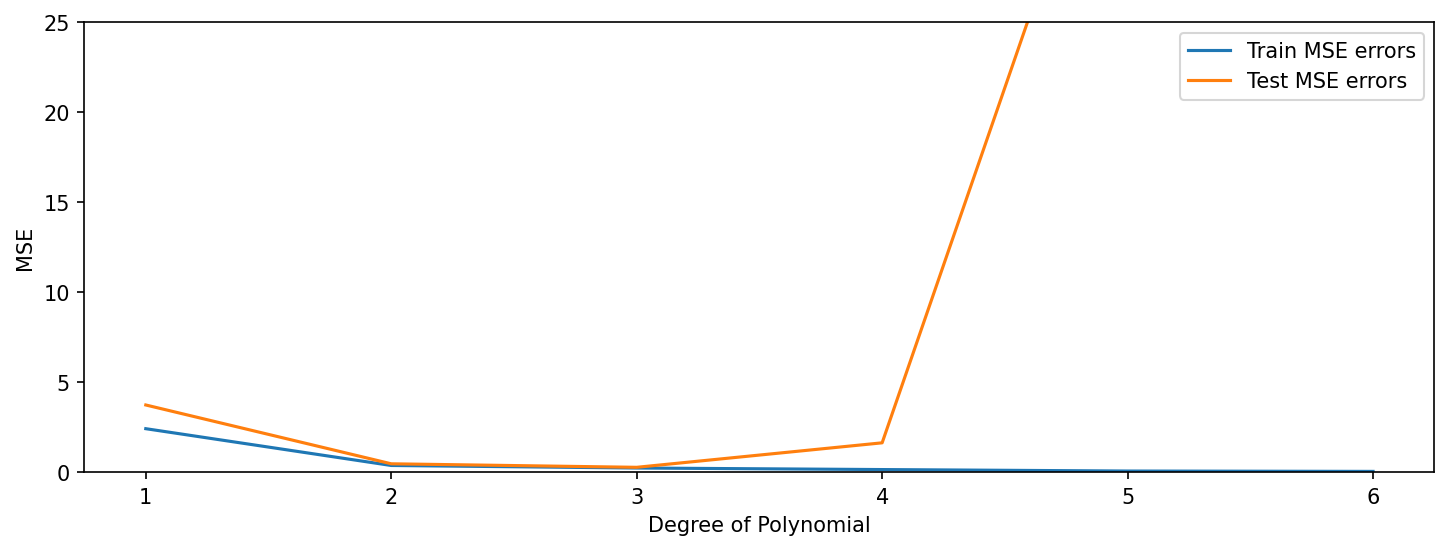

In [83]:
# Creating empty canvas 
figure = plt.figure(figsize=(9,3) , dpi = 150) 
# Adding axes to the figure 
axes = figure.add_axes([0,0,1,1])
# Plotting on the axes 
axes.plot(range(1,7) , train_MSE_errors , label = "Train MSE errors")
axes.plot(range(1,7) , test_MSE_errors , label = "Test MSE errors") 
# Adding axes labels 
axes.set_xlabel("Degree of Polynomial")
axes.set_ylabel("MSE")
# Adding Limits 
plt.ylim(0,25)
plt.legend()

RMSE error 

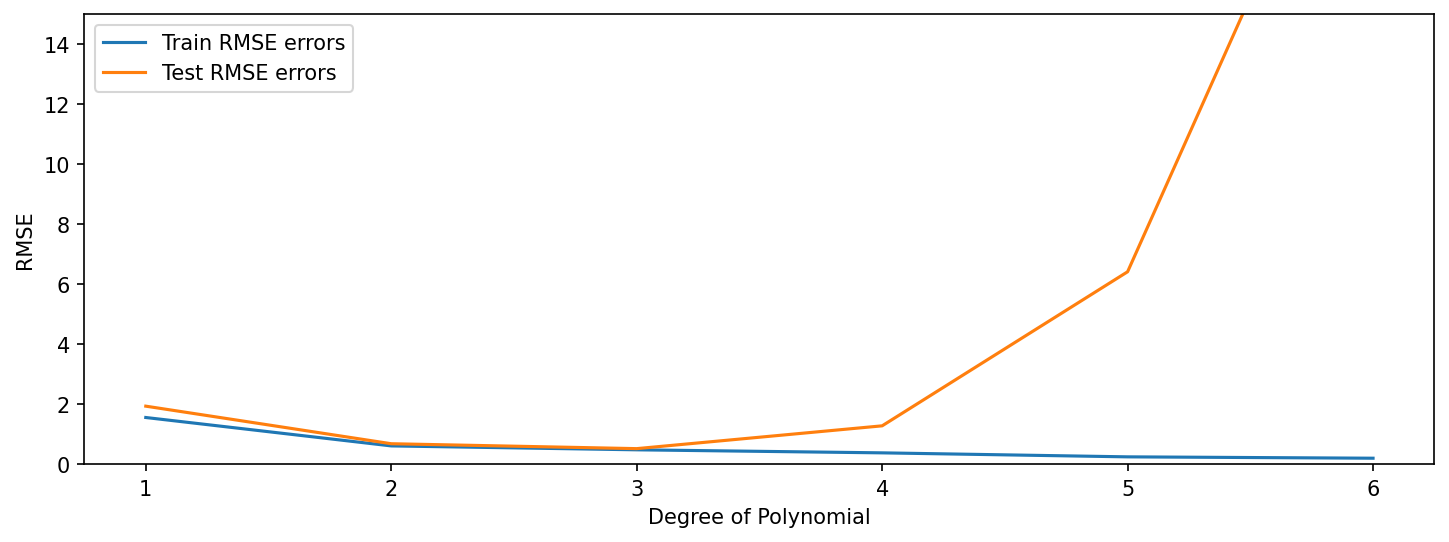

In [84]:
# Creating empty canvas 
figure = plt.figure(figsize=(9,3) , dpi = 150) 
# Adding axes to the figure 
axes = figure.add_axes([0,0,1,1])
# Plotting on the axes 
axes.plot(range(1,7) , train_RMSE_errors , label = "Train RMSE errors")
axes.plot(range(1,7) , test_RMSE_errors , label = "Test RMSE errors") 
# Adding axes labels 
axes.set_xlabel("Degree of Polynomial")
axes.set_ylabel("RMSE")
plt.ylim(0,15)
plt.legend()

Thus by above three graphs we can conclude that degree = 2 is the best fit choice for our model 

### Finalizing the model

In [99]:
final_model = LinearRegression() 
final_polynomial_converter = PolynomialFeatures(degree = 2 , include_bias= False)
final_poylnomial_features = final_polynomial_converter.fit_transform(X) 

# splitting training and testing data 
X_train, X_test, y_train, y_test = train_test_split(final_poylnomial_features, y, test_size=0.33, random_state=42) 

# Training on this new polynomial data set 
final_model.fit(X_train , y_train)  

# Predicting on both training and testing set 
train_predictions = final_model.predict(X_train)
test_predictions = final_model.predict(X_test)

# Calculating errors in training set 
final_MAE_train = mean_absolute_error(y_train , train_predictions)
final_MSE_train = mean_squared_error(y_train , train_predictions)
final_RMSE_train = np.sqrt(mean_squared_error(y_train , train_predictions))
    
# Calculating errors in testing set 
final_MAE_test = mean_absolute_error(y_test , test_predictions)
final_MSE_test = mean_squared_error(y_test , test_predictions)
final_RMSE_test = np.sqrt(mean_squared_error(y_test , test_predictions)) 

In [101]:
final_MAE_train

0.4002048444585127

In [102]:
final_MSE_train

0.366957537537421

In [103]:
final_RMSE_train

0.6057702019226606

In [105]:
final_MAE_test

0.5475837919149611

In [106]:
final_MSE_test

0.46030624938882525

In [107]:
final_RMSE_test

0.6784587307926881

In [108]:
df["sales"].mean()

14.0225

Thus our final model Polynomial Regression of degree 2 has an accuracy of about 95% 